# (Ford GoBike System)
## by (Adham AlQattawy)

## Investigation Overview

> In this investigation, I will try to find whether the Ford GoBike system is successful to attract people or not. I will study the trips duration, the days that has the most trips, and the hours that has the most trips. then I will study the numbers of users type and study the relation between the age of the user and the trip duration, and finally study the relation between the age and the trip duration for each user type. to finally answer my question.

## Dataset Overview

> The data set is called Fordgobike, This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, and represents trips taken by members of the service for month of February of 2019

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')
clean_df = ford_df.copy()
clean_df = clean_df.dropna()
clean_df = clean_df.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis = 1)
clean_df['start_time'] = pd.to_datetime(clean_df['start_time'])
clean_df['end_time'] = pd.to_datetime(clean_df['end_time'])
clean_df['Age'] = 2021 - clean_df['member_birth_year']
clean_df = clean_df.drop(['member_birth_year'], axis = 1)
clean_df['start_month'] = clean_df.start_time.dt.strftime('%B')
clean_df['start_day'] = clean_df.start_time.dt.strftime('%A')
clean_df['start_hour'] = clean_df.start_time.dt.strftime('%H')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (The Distibution of the Trips duration)

> the distibuton of the trips duration have a range from 1 minute to more than 100 minute, and to better see it I changed the scale to be from 0 to 40 minutes only, and as we see the most trips took from 2 to 12 minutes.

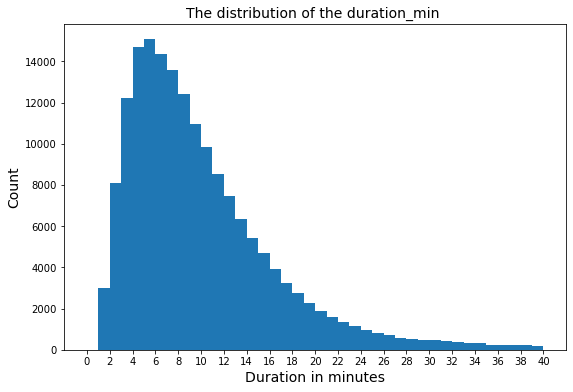

In [4]:
clean_df['duration_min'] = clean_df['duration_sec']/60
plt.figure(figsize = [9, 6])
bins = np.arange(0, 40+1,1)   
plt.hist(data = clean_df, x = 'duration_min',  bins = bins, color='#1f77b4');
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]);
plt.xlabel('Duration in minutes', fontsize=14);
plt.ylabel('Count', fontsize=14);
plt.title("The distribution of the duration_min ", fontsize=14);

## (Number of trips per day)

> As we see in the chart, most of the trips happened in the work days more than the vacations, so most of the people's trip were for work. 

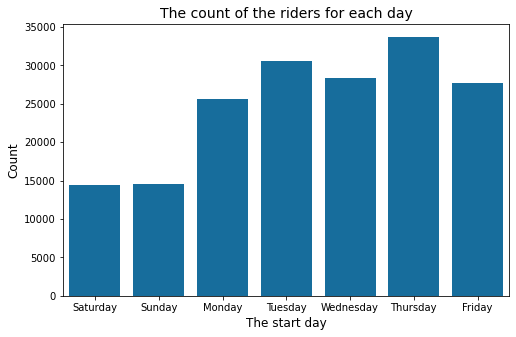

In [5]:
#The count of the riders for each day
plt.figure(figsize = [8, 5]) ;
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data = clean_df, x='start_day', color = base_color, order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.xlabel('The start day', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.title("The count of the riders for each day", fontsize=14);

## (Number of trips per hour)

> to make sure of the conclusion I made about people's trip are for work, this chart is showing the hours that has the most trips, and it was 8am and 5pm, and this confirms my previous conclusion.

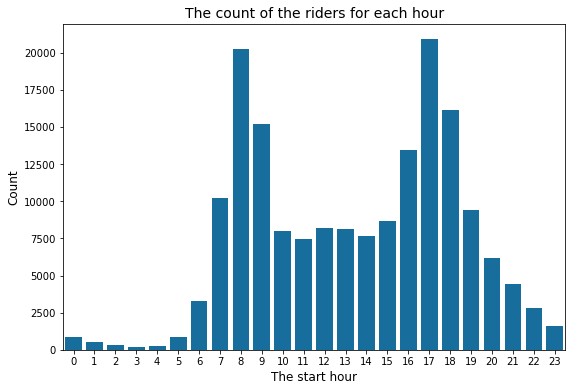

In [6]:
#The count of the riders for each hour
#converting the starthour column to int so that it can be ordered easily
clean_df['start_hour'] = clean_df['start_hour'].astype(int)
plt.figure(figsize = [9, 6]) 
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data = clean_df, x='start_hour', color = base_color);
plt.xlabel('The start hour', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.title("The count of the riders for each hour", fontsize=14);

## (Number of each user type)

> I studied the numbers of each user type, whether a customer or a sbuscriber, and the chart shows that the subscribers are more than customers.

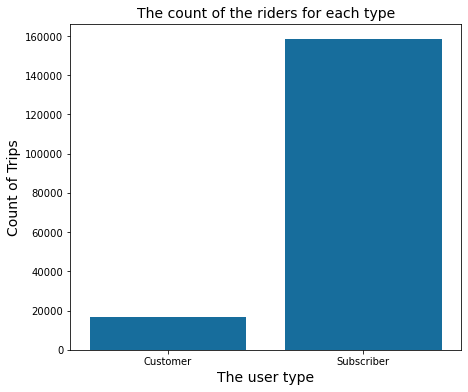

In [26]:
#The count of the riders for each type
plt.figure(figsize = [7, 6])
base_color = sb.color_palette('colorblind')[0]
sb.countplot(data = clean_df, x='user_type', color = base_color);
plt.xlabel('The user type', fontsize=14);
plt.ylabel('Count of Trips', fontsize=14)
plt.title("The count of the riders for each type", fontsize=14);

## (The relation between the Age and the Duration per minute)

> I studied the relation between the user's age and the trip duration, and found that the people from the age of 20 to the age of 40 took trips lasting from two minutes to 40 minutes.

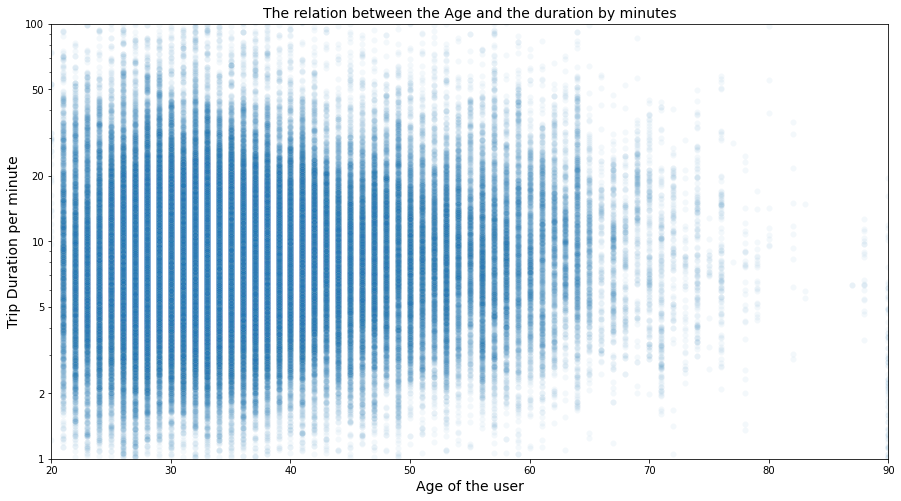

In [27]:
plt.figure(figsize=(15,8));
g = sb.scatterplot(data = clean_df, x="Age", y="duration_min", alpha=0.05);
g.set(xlim=(20,90), yscale="log" , ylim=(1,100))
plt.yticks([1,2,5,10,20,50,100],[1,2,5,10,20,50,100]);
plt.xlabel('Age of the user', fontsize=14);
plt.ylabel('Trip Duration per minute', fontsize=14);
plt.title("The relation between the Age and the duration by minutes", fontsize=14);

## (The relation between the Age and the Duration per minute per user type)

> Now I looked at the relation between the Age of the user and the trip duration per user type, to find that the trip duration doesn't differ from customer to subscriber, as for both types the duration decreases when the age increases. But to see the difference, I seperated each type to its chart, and found that the age of the subscribers is more than the age of the customers.

> The final result I got is that the Ford GoBike System has managed to attract large number of customers to subscribe, and to keep using the system for a long time, and it managed to attrack large scale of ages (from 20 to more than 90 years old)

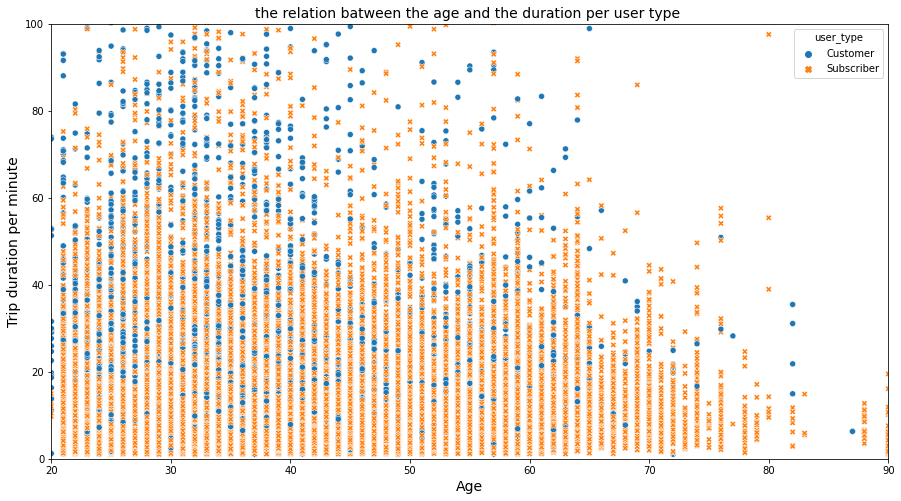

In [30]:
#the relation between the age and duration_min per the user type
plt.figure(figsize=(15,8));
g = sb.scatterplot(data = clean_df, x="Age", y="duration_min", hue="user_type", style="user_type", );
g.set(xlim=(20,90), ylim=(0,100));
plt.xlabel('Age', fontsize=14);
plt.ylabel('Trip duration per minute', fontsize=14);
plt.title('the relation batween the age and the duration per user type ', fontsize=14);

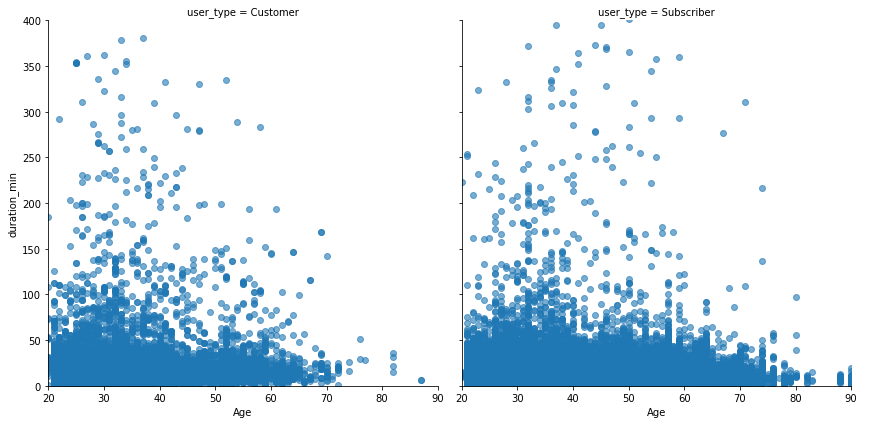

In [31]:
#seperating each user type to clear see the difference
sb.FacetGrid(clean_df, col = "user_type", height = 6, xlim=(20,90), ylim=(0,400)).map(plt.scatter, "Age", "duration_min", alpha =0.6).add_legend();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [7]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input


[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1528483 bytes to slide_deck_template.slides.html
